In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

df=pd.read_csv("car_price_problem.csv")
print(df.shape)
df.head()

(301, 9)


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [5]:
def encodedata(df):
    df_list = df.unique().tolist()
    df_dict = {}
    for i, item in enumerate(df_list):
        df_dict[item] = i
    return df_dict

car_name_dict = encodedata(df.Car_Name)
Fuel_Type_dict = encodedata(df.Fuel_Type)
Seller_Type_dict = encodedata(df.Seller_Type)
Transmission_dict = encodedata(df.Transmission)
print(len(car_name_dict), len(Fuel_Type_dict), len(Seller_Type_dict), len(Transmission_dict))

98 3 2 2


In [6]:
df['Car_Name'] = df['Car_Name'].map(car_name_dict)
df['Fuel_Type'] = df['Fuel_Type'].map(Fuel_Type_dict)
df['Seller_Type'] = df['Seller_Type'].map(Seller_Type_dict)
df['Transmission'] = df['Transmission'].map(Transmission_dict)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,2014,3.35,5.59,27000,0,0,0,0
1,1,2013,4.75,9.54,43000,1,0,0,0
2,2,2017,7.25,9.85,6900,0,0,0,0
3,3,2011,2.85,4.15,5200,0,0,0,0
4,4,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,94,2016,9.50,11.60,33988,1,0,0,0
297,95,2015,4.00,5.90,60000,0,0,0,0
298,94,2009,3.35,11.00,87934,0,0,0,0
299,94,2017,11.50,12.50,9000,1,0,0,0


In [7]:
target_df = df[["Selling_Price"]]
print(target_df.shape)
target_df.head()

(301, 1)


,Selling_Price
0,3.35
1,4.75
2,7.25
3,2.85
4,4.60


In [8]:
input_df= df.drop('Selling_Price', axis=1)
print(input_df.shape)
input_df.head()

(301, 8)


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,0,2014,5.59,27000,0,0,0,0
1,1,2013,9.54,43000,1,0,0,0
2,2,2017,9.85,6900,0,0,0,0
3,3,2011,4.15,5200,0,0,0,0
4,4,2014,6.87,42450,1,0,0,0


In [9]:

# def absolute_maximum_scale(series):
#     return series / series.abs().max()

# for col in input_df.columns:
#     input_df[col] = absolute_maximum_scale(input_df[col])
# print(input_df)   

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_df, target_df, test_size=0.2, random_state=42, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(240, 8) (61, 8) (240, 1) (61, 1)


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.fit_transform(X_test)

In [13]:

from sklearn.linear_model import LinearRegression
#Training
reg = LinearRegression().fit(X_train, y_train)

#testing
print(reg.coef_)
print(reg.intercept_)
pred = reg.predict( X_test)

[[ 0.24950932  1.02235103  3.97436237 -0.23832956  0.63673311 -0.50857021
   0.56395263 -0.26172343]]
[4.64229167]


In [14]:
from sklearn.metrics import r2_score
score = r2_score( y_test, pred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 84.0%


In [15]:
print(X_test, pred)

[[ 5.69165514e-01  8.72689094e-01 -1.05840630e+00 -4.50589820e-01
  -5.71040241e-01  1.43178211e+00  2.25831796e+00 -1.29099445e-01]
 [ 1.25272443e+00  8.72689094e-01  7.76319736e-01 -9.96906460e-01
  -5.71040241e-01 -6.98430296e-01 -4.42807443e-01 -1.29099445e-01]
 [ 1.22424280e+00 -5.01092448e-01  1.84926848e-01  1.05996310e+00
   1.75119007e+00 -6.98430296e-01 -4.42807443e-01 -1.29099445e-01]
 [ 8.82463348e-01 -8.44537833e-01 -1.05840630e+00  1.09680175e-02
  -5.71040241e-01  1.43178211e+00 -4.42807443e-01  7.74596669e+00]
 [-9.40360414e-01 -1.57647062e-01  1.48176697e+00  2.20808994e-01
  -5.71040241e-01 -6.98430296e-01 -4.42807443e-01 -1.29099445e-01]
 [-1.36758473e+00  5.29243709e-01  1.17339089e-01  3.20085889e-01
   1.75119007e+00 -6.98430296e-01 -4.42807443e-01 -1.29099445e-01]
 [-5.98580959e-01  5.29243709e-01 -9.31679248e-01 -3.66670213e-01
  -5.71040241e-01  1.43178211e+00 -4.42807443e-01 -1.29099445e-01]
 [ 1.41941195e-01  1.85798323e-01 -1.01475587e+00 -1.12194667e+00
  -

In [16]:
#Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dec_model= DecisionTreeRegressor()
dec_model.fit(X_train,y_train)
dec_model.score(X_test, y_test)

0.7986389775187449

In [19]:
#Random Forest Regression

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
# random_model=  RandomForestRegressor()
# random_model.fit(X_train,y_train)
# random_model.score(X_test, y_test)

In [26]:
accuracy = []
n_esstimator = []

for i in range(500):
    n_esstimator.append(i)
    regressor= RandomForestRegressor(n_estimators=i+1, random_state=0)
    regressor.fit(X_train,y_train)
    accuracy.append(regressor.score(X_test, y_test))
    
print(accuracy)
print(n_esstimator)
print("The largest number is:", max(accuracy))

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\3915157770.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


[0.7589542603832847, 0.9085213426033896, 0.8923211454431978, 0.9057097712943332, 0.8016205883166165, 0.824708729153836, 0.860959973432158, 0.8661779548486381, 0.8765645223212748, 0.8900349567014846, 0.8884186287588484, 0.8864354126362913, 0.8832896785417046, 0.8898805364717252, 0.8938166873170439, 0.8983847388072854, 0.8935844363636125, 0.8945414042991976, 0.897842683288494, 0.8975399143427069, 0.9003193389092216, 0.9000153949385656, 0.9010757812973378, 0.9054269115973915, 0.9098761317546051, 0.9068833684010209, 0.903383607784554, 0.8957318200914359, 0.8899088273556117, 0.8897591584095944, 0.888608376168485, 0.8939406215475323, 0.8953087079522346, 0.8973615037253465, 0.9001834168837057, 0.9043273814295095, 0.9050869135985394, 0.9067098514903843, 0.9103072957246189, 0.9117023855388139, 0.9089429130074367, 0.909233315420764, 0.9091474398358032, 0.9089622255321659, 0.908167555190218, 0.9074902416334321, 0.9097786678581724, 0.9098343126051963, 0.9124016144963937, 0.912643295859636, 0.91058

In [29]:
accuracy.index(0.9131918405198076)


54

In [30]:
n_esstimator[54]

54

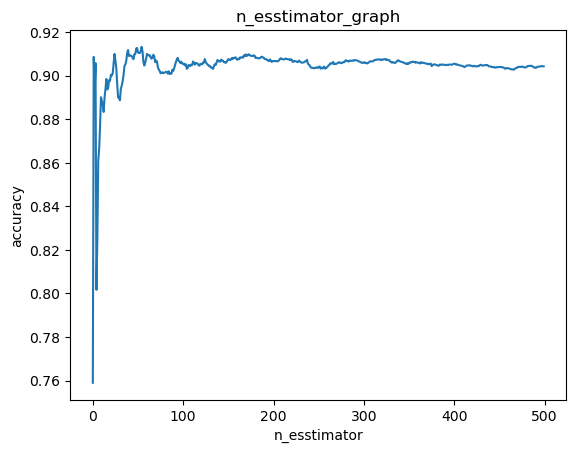

In [31]:
import matplotlib.pyplot as plt

# n_esstimator = [10,20,30,40,50,60,70,80,90,100]
# accuracy = [89.00,89.75,88.97,91.17,91.26,90.77,90.61,90.12,90.20,90.55]

plt.plot(n_esstimator, accuracy)
plt.title('n_esstimator_graph')
plt.xlabel('n_esstimator')
plt.ylabel('accuracy')
plt.show()

In [32]:
accuracy = []
random_state = []

for i in range(500):
    random_state.append(i)
    regressor= RandomForestRegressor(n_estimators=100, random_state=i+1)
    regressor.fit(X_train,y_train)
    accuracy.append(regressor.score(X_test, y_test))
    
print(accuracy)
print(random_state)
print("The largest number is:", max(accuracy))

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)
C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.f

[0.903755411203773, 0.8958043123287867, 0.910089053273268, 0.9053239451188532, 0.9116173791895763, 0.917284597941607, 0.9120453038032484, 0.8986345245765026, 0.8979868492950099, 0.9061048833454801, 0.8861691221511977, 0.8889890305187829, 0.9106776203890292, 0.9058077539410941, 0.901895800152738, 0.8898778401269969, 0.8984971231162519, 0.9026706547268455, 0.901710343938622, 0.9115361247387138, 0.9054774614260144, 0.9030104726614503, 0.9116963196723903, 0.9092913620281348, 0.9113707001057336, 0.8993110737103164, 0.913141644068902, 0.9047594207696141, 0.898875790616763, 0.8966357451339263, 0.908228863993534, 0.8983454482224374, 0.908842222973442, 0.9019769946607034, 0.916126679724801, 0.9038364432617192, 0.9019243321177604, 0.9048696192849104, 0.9120029717706536, 0.9068323630475547, 0.8851653847871696, 0.906202974939862, 0.893989106546069, 0.9094982332140743, 0.9104944297929625, 0.9013589884659012, 0.9036210758408552, 0.9001640393163842, 0.8919141878320362, 0.8939554634936705, 0.910676454

C:\Users\divya\AppData\Local\Temp\ipykernel_24064\1805891301.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


In [33]:
accuracy.index(0.9264793462358752)

189

In [34]:
random_state[189]

189

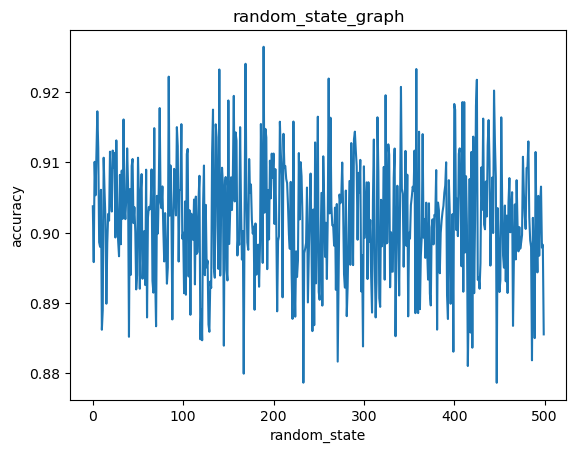

In [35]:
import matplotlib.pyplot as plt

plt.plot(random_state, accuracy)
plt.title('random_state_graph')
plt.xlabel('random_state')
plt.ylabel('accuracy')
plt.show()